In [264]:
%matplotlib notebook
import matplotlib.pyplot as plt
import hyperspy.api as hs
from stemutils.io import *
import numpy as np
from matplotlib.widgets import CheckButtons
from ipywidgets.widgets import BoundedIntText
from IPython.display import display
from ipywidgets import Checkbox

In [2]:
root_path = Path('/dls/science/groups/imaging/ePSIC_students/Andy_Bridger/mg28749-1/processing/Calibrated_MD')

In [5]:
data_paths = root_path.walk('.hdf5', max_depth=1)

In [278]:
dp = data_paths[1]

In [279]:
diff_dat = hs.load(dp)

/home/dto55534/.local/lib/python3.7/site-packages/hyperspy/misc/utils.py:475: VisibleDeprecationWarning: Use of the `binned` attribute in metadata is going to be deprecated in v2.0. Set the `axis.is_binned` attribute instead. 
  VisibleDeprecationWarning,
/home/dto55534/.local/lib/python3.7/site-packages/hyperspy/io.py:563: VisibleDeprecationWarning: Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.
  'signal axes instead.', VisibleDeprecationWarning)


In [280]:
cluster_data = np.load(dp.redirect('/Refined_N_components/32/mapdata.npy',1))

In [281]:
keep_cluster = {}
cluster_info = {}
for uind in np.unique(cluster_data):
    print(uind)
    keep_cluster[uind] = True
    cluster_info[uind] = {}
    cluster_info[uind]['region'] = np.where(cluster_data == uind, 1, 0)
    patterns = diff_dat.data[np.where(cluster_data == uind)]
    cluster_info[uind]['mean_pattern'] = np.mean(patterns, axis = 0)
    cluster_info[uind]['max_pattern'] = np.max(patterns, axis = 0)

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0


In [282]:
view_ind = 0.0

In [283]:
plot_dic = {'kc': keep_cluster, 'ci': cluster_info, 'vi': view_ind}

In [284]:
def set_spine_color(ax, c):
    ax.spines['bottom'].set_color(c)
    ax.spines['top'].set_color(c)
    ax.spines['left'].set_color(c)
    ax.spines['right'].set_color(c)
    
def set_spine_width(ax, w):
    ax.spines['bottom'].set_lw(w)
    ax.spines['top'].set_lw(w)
    ax.spines['left'].set_lw(w)
    ax.spines['right'].set_lw(w)
    
def plot_pattern(fig, ax, plot_dic, method = 'mean_pattern'):
    keep_cluster, cluster_info, view_ind = plot_dic['kc'], plot_dic['ci'],plot_dic['vi']
    state = [keep_cluster[view_ind]]
    ax.imshow(cluster_info[view_ind][method], vmax = 5)
    ax.set_xticks([])
    ax.set_yticks([])
    if state[0] == True:
        set_spine_color(ax, 'green')
    if state[0] == False:
        set_spine_color(ax, 'red')
    set_spine_width(ax, 5)
    plt.draw()

Select the clusters that contain diffraction data of interest

<IPython.core.display.Javascript object>


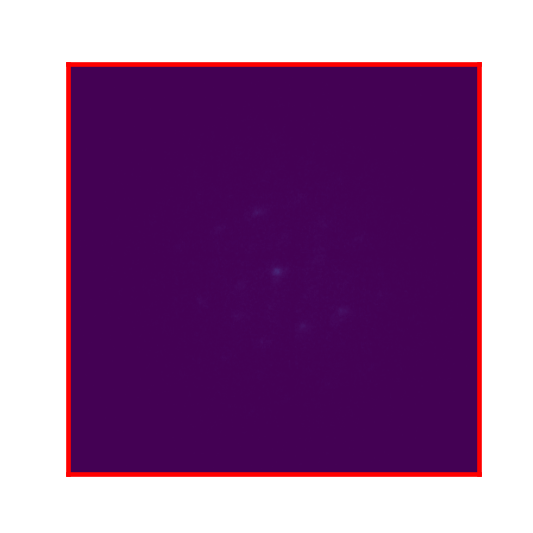

BoundedIntText(value=0, description='Current Cluster:', max=31)

Checkbox(value=True, description='Keep')

In [286]:
fig, ax  = plt.subplots(1,1,figsize = (8,8))
plot_pattern(fig, ax, plot_dic, method = 'mean_pattern')



bit = BoundedIntText(
    value=int(plot_dic['vi']),
    min=int(cluster_data.min()),
    max=int(cluster_data.max()),
    step=1,
    description='Current Cluster:',
    disabled=False
)
display(bit)

box = Checkbox(keep_cluster[view_ind], description='Keep')
display(box)

def changed(b):
    try:
        plot_dic['kc'][plot_dic['vi']] = b['new']['value']
        plot_pattern(fig, ax,  plot_dic, method = 'mean_pattern')
    except:
        pass
    
def bit_change(b):
    try:
        plot_dic['vi'] = float(b['new']['value'])
        plot_pattern(fig, ax,  plot_dic, method = 'mean_pattern')
        box.value = plot_dic['kc'][plot_dic['vi']]
    except:
        pass


bit.observe(bit_change)
box.observe(changed)

View the dictionary of which clusters have been selected

In [290]:
plot_dic['kc']

{0.0: False,
 1.0: False,
 2.0: False,
 3.0: True,
 4.0: False,
 5.0: True,
 6.0: False,
 7.0: False,
 8.0: True,
 9.0: True,
 10.0: False,
 11.0: True,
 12.0: True,
 13.0: True,
 14.0: False,
 15.0: True,
 16.0: True,
 17.0: True,
 18.0: True,
 19.0: True,
 20.0: True,
 21.0: False,
 22.0: False,
 23.0: True,
 24.0: True,
 25.0: True,
 26.0: False,
 27.0: True,
 28.0: False,
 29.0: True,
 30.0: True,
 31.0: False}

View the real space included and excluded pixels

In [291]:
inclusion_map = np.zeros(diff_dat.data.shape[:2])
for k,v in plot_dic['kc'].items():
    if v == False:
        inclusion_map += cluster_info[k]['region']

<IPython.core.display.Javascript object>


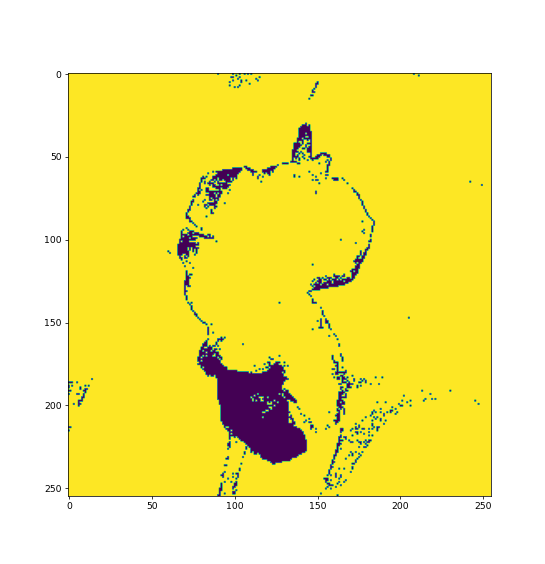

In [292]:
plt.figure()
plt.imshow(inclusion_map)

In [293]:
fdp = Path('/dls/science/groups/imaging/ePSIC_students/Andy_Bridger/mg28749-1/processing/Calibrated_MD')



dps = [dp for dp in fdp.walk('.hdf5', max_depth =1) if (dp.redirect('FullModel').exists() and (len(dp.redirect('FullModel').ls()) > 0))]
new_dps = [dp for dp in dps if (dp.redirect('RefinedModel').exists() and (len(dp.redirect('RefinedModel').ls()) == 0))]

In [294]:
new_dps

[Path('/dls/science/groups/imaging/ePSIC_students/Andy_Bridger/mg28749-1/processing/Calibrated_MD/20210925_152338/20210925_152338_data.hdf5'),
 Path('/dls/science/groups/imaging/ePSIC_students/Andy_Bridger/mg28749-1/processing/Calibrated_MD/20210925_112041/20210925_112041_data.hdf5'),
 Path('/dls/science/groups/imaging/ePSIC_students/Andy_Bridger/mg28749-1/processing/Calibrated_MD/20210925_112312/20210925_112312_data.hdf5'),
 Path('/dls/science/groups/imaging/ePSIC_students/Andy_Bridger/mg28749-1/processing/Calibrated_MD/20210925_144251/20210925_144251_data.hdf5'),
 Path('/dls/science/groups/imaging/ePSIC_students/Andy_Bridger/mg28749-1/processing/Calibrated_MD/20210925_115220/20210925_115220_data.hdf5'),
 Path('/dls/science/groups/imaging/ePSIC_students/Andy_Bridger/mg28749-1/processing/Calibrated_MD/20210925_151627/20210925_151627_data.hdf5'),
 Path('/dls/science/groups/imaging/ePSIC_students/Andy_Bridger/mg28749-1/processing/Calibrated_MD/20210925_135721/20210925_135721_data.hdf5'),

In [298]:
haadf_paths = Path('/dls/e02/data/2022/mg30740-1/raw/raw/Ca_Pillared')

In [306]:
haadf = hs.load(haadf_paths.ls()[0])

In [307]:
haadf.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Stage
│       │   ├── tilt_alpha = 0.05000000074505806
│       │   ├── tilt_beta = 0.0
│       │   ├── x = 0.22981309375
│       │   ├── y = 0.21679859375000002
│       │   └── z = -0.14685929687500002
│       ├── acquisition_mode = STEM
│       ├── beam_current = 0.0
│       ├── beam_energy = 300.0
│       ├── camera_length = 200.0
│       ├── dwell_time = 8e-06
│       ├── magnification = 60000.0
│       └── microscope = JEOL COM
├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 1.7.0
│   │       ├── io_plugin = hyperspy.io_plugins.digital_micrograph
│   │       ├── operation = load
│   │       └── timestamp = 2022-08-16T15:24:22.093791+00:00
│   ├── date = 2022-04-26
│   ├── original_filename = HAADF_60kX_0019.dm3
│   ├── time = 16:10:07
│   └── title = HAADF_60kX_0019
├── Sample
│   └── description = Cd-Pt-S
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 1.0
    │       └── gain_offset = 0.0
    ├── quantity = Intensity
    └── signal_type =

<IPython.core.display.Javascript object>


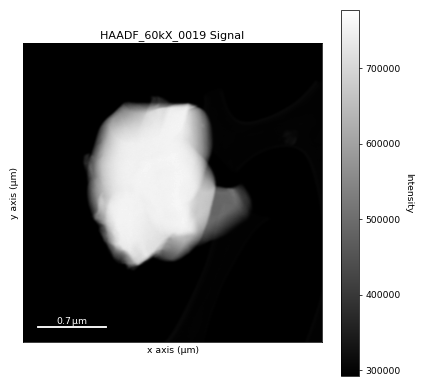

<IPython.core.display.Javascript object>


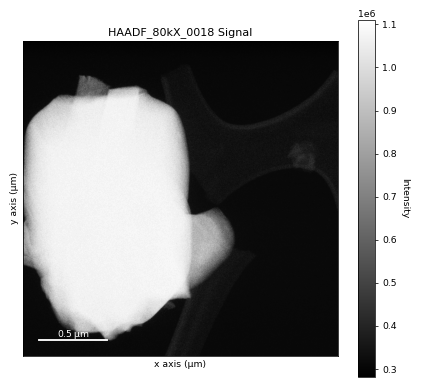

<IPython.core.display.Javascript object>


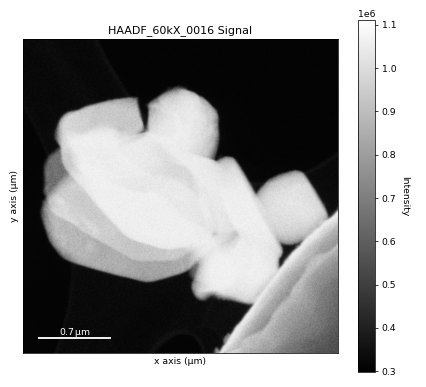

<IPython.core.display.Javascript object>


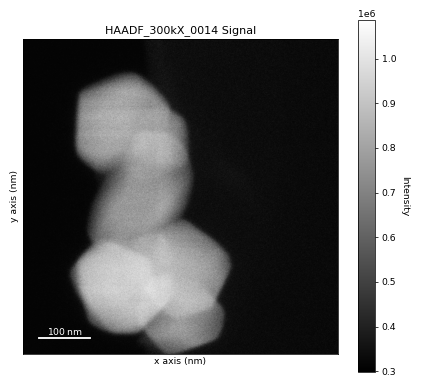

<IPython.core.display.Javascript object>


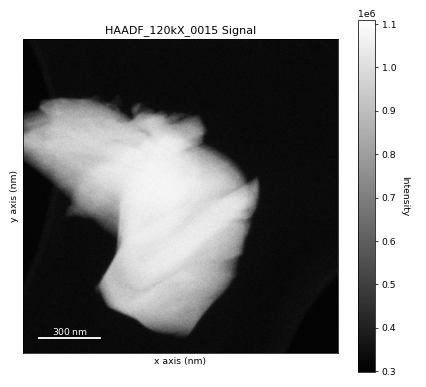

<IPython.core.display.Javascript object>


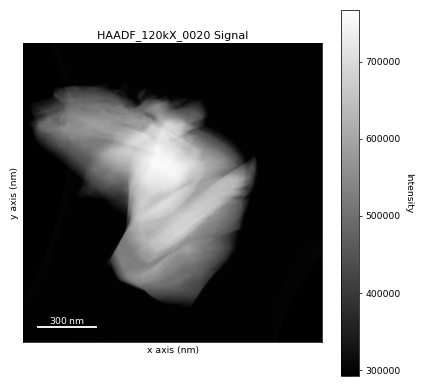

<IPython.core.display.Javascript object>


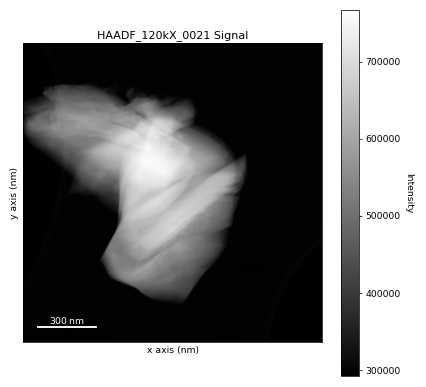

<IPython.core.display.Javascript object>


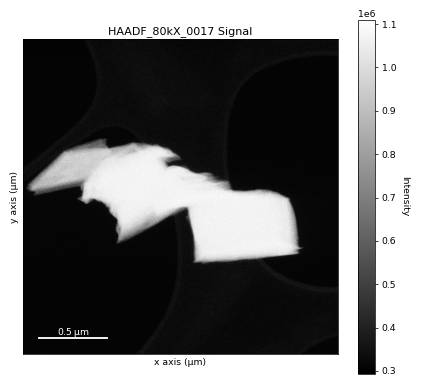

In [300]:
for p in haadf_paths.ls():
    hs.load(p).plot()

<IPython.core.display.Javascript object>


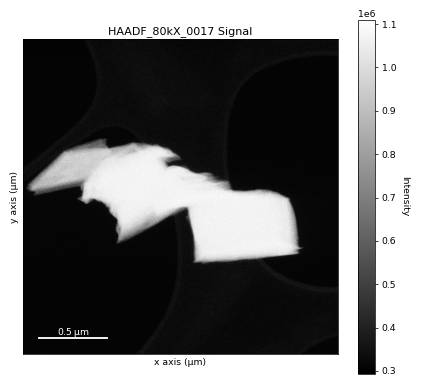

In [297]:
haadf.plot()

In [301]:
eds3 = hs.load('/dls/e02/data/2022/mg30740-1/EDX/EDX_exports/Ca_Pillared/EDS Data 3.rpl')

<IPython.core.display.Javascript object>


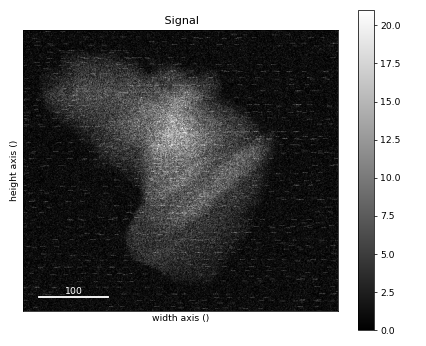

In [304]:
eds3.sum().plot()